# **Single-Qubit Gates as Rotations on the Bloch Sphere**

*prepared by Ain Nabihah*

<br><br><br>

A qubit can be represented on the Bloch sphere as a unit vector pointing
in certain direction. Single-qubit gates act as *rotations* of this vector
around one of the coordinate axes $(x, y, z)$. Understanding these rotations
helps visualize how each gate transforms the qubit state.

In this section, the following single-qubit gates will be covered accordingly:

1. **General single-qubit gate:** $U$-gate
2. **Phase gate:** $P$ gate
3. **Rotation gates:** $R_z$, $R_y$, $R_x$ gates  
4. **Identity gate:** $I$ gate
5. **Pauli gates:** $X$, $Y$, $Z$ gates  
6. **Hadamard gate:** $H$ gate
7. **Phase gates:** $S$, $S^†$ gates
8. **T gates:** $T$, $T^†$ gates


Each section will include the **matrix representation**, **Bloch sphere visualization**, and **Qiskit example code** for practical understanding.
<hr>


In [1]:
# Install Qiskit and visualization dependencies
!pip install qiskit qiskit[visualization] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00


<h3><b> $U$-gate </b></h3>

**Syntax in Qiskit:**
    
`qc.u (θ, ϕ, λ, qubit)`

where all parameters $(θ, φ, λ)$ are in radians.

---

<h4> Description </h4>
The $U$ gate is the most general one-qubit gate in Qiskit.
By adjusting $θ$, $φ$, and $λ$, it can describe any possible single-qubit rotation.
Other gates ($X$, $Y$, $Z$, $H$, etc.) are special cases of $U$, which will be discussed later.

Matrix form:

$U(θ, φ, λ) =
\begin{pmatrix}
\cos(\frac{\theta}{2}) & -e^{i\lambda} \sin(\frac{\theta}{2}) \\
e^{i\phi} \sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)} \cos(\frac{\theta}{2})
\end{pmatrix}$

Bloch sphere interpretation:
- $θ$ controls how far the qubit tilts away from $|0⟩$ towards $|1⟩$.
- $φ$ and $λ$ rotate the state around the $z$-axis.

<hr>

<h3><b> Example 1: Effects of $U$-gate on the Bloch Sphere </h3></b>

Let the initial qubit be in the state $|0⟩$. Apply the single-qubit gate
$U(\frac{π}{3}, \frac{π}{3}, \frac{π}{3})$
and determine the resulting state vector.  

Describe how the qubit’s position changes on the Bloch sphere.  
Then repeat the experiment starting from $|1⟩$ (add an $X$ gate before $U$) and compare the two rotation paths.

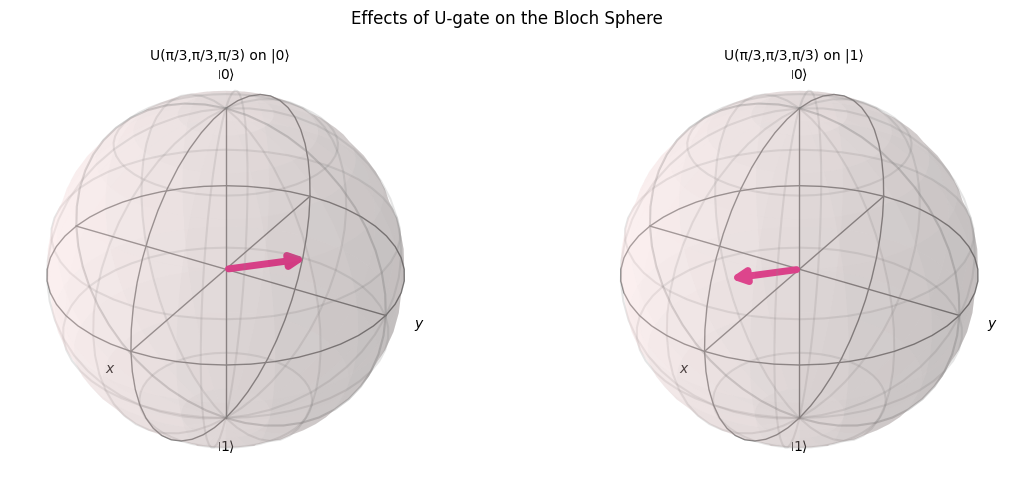

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Helper function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Create circuits and obtain statevectors

# Initial |0> state
qc0 = QuantumCircuit(1)
qc0.u(np.pi/3, np.pi/3, np.pi/3, 0) # Apply the U-gate
state0 = Statevector.from_instruction(qc0)

# Initial |1> state (apply X first before U-gate)
qc1 = QuantumCircuit(1)
qc1.x(0) # Apply the X-gate for state |1>
qc1.u(np.pi/3, np.pi/3, np.pi/3, 0) # Apply the U-gate
state1 = Statevector.from_instruction(qc1)

# Plot Bloch vectors side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state0), title="U(π/3,π/3,π/3) on |0⟩", ax=axes[0])
plot_bloch_vector(bloch_coords(state1), title="U(π/3,π/3,π/3) on |1⟩", ax=axes[1])

plt.suptitle("Effects of U-gate on the Bloch Sphere")
plt.tight_layout()
plt.show()


<h4>Conclusion:</h4>

The $U$-gate rotates the qubit around an axis defined by $(θ, φ, λ)$.
Here, $θ$ = $φ$ = $λ$ = $\frac{π}{3}$, so both $|0⟩$ and $|1⟩$ rotate by the same angle,
but their paths differ because they start at opposite points on the Bloch sphere.

<hr>


<h3><b> Question 1 </h3></b>

Check whether $U(π, 0, \frac{π}{2})$ acting on $|0⟩$ produces the same result as the Pauli-Y gate. In Qiskit, the Pauli-Y gate can be applied using <code>qc.y(qubit)</code>.

(Hint: Compare the final statevectors and plot the Bloch sphere.)


In [ ]:
#  Your solution here

<hr>

<h3><b> Phase Gate </h3></b>

**Syntax in Qiskit:**

`qc.p(λ, qubit)`

where $(λ)$ is in radians.

---
<h4> Description </h4>

The Phase gate ($P$ gate) applies a phase rotation of angle $λ$ to a qubit. It changes the relative phase between the states $|0⟩$ and $|1⟩$, without affecting their measurement probabilities.

In Qiskit, $P(λ)$ is equivalent to a rotation around the **$z$-axis** by angle $λ$.

The P gate is a special case of the general $U$ gate with $θ$ = 0 and $ϕ$ = 0:

$P(λ)$ = $U(0, 0, λ)$

Related gates include the **S gate**, where $P(\frac{π}{2})$, **T gate**, where $P(\frac{π}{4})$ and **Z gate** where $P(π)$, which will be discussed later.

Matrix form:

$P(λ) =
\begin{pmatrix}
1 & 0 \\
0 & e^{iλ}
\end{pmatrix}$

Bloch sphere interpretation:
- The P gate rotates the qubit around the $z$-axis by an angle λ
- The qubit's tilt (distance from $|0⟩$) stays the same, with phase changing.

<hr>

<h3> <b> Example 2: Visualizing the Effect of $P$ gate on the Bloch Sphere <h3></b>

To see how the $P$ gate adds a phase (rotation around the $z$-axis), we first need to place our qubit in a superposition state.
This is done by applying a Hadamard ($H$) gate, using
<code>qc.h(qubit)</code> to the initial state $|0⟩$.

Then, we apply a $P$ gate with an angle of $\frac{π}{2}$ to see how it rotates the state vector on the Bloch sphere.

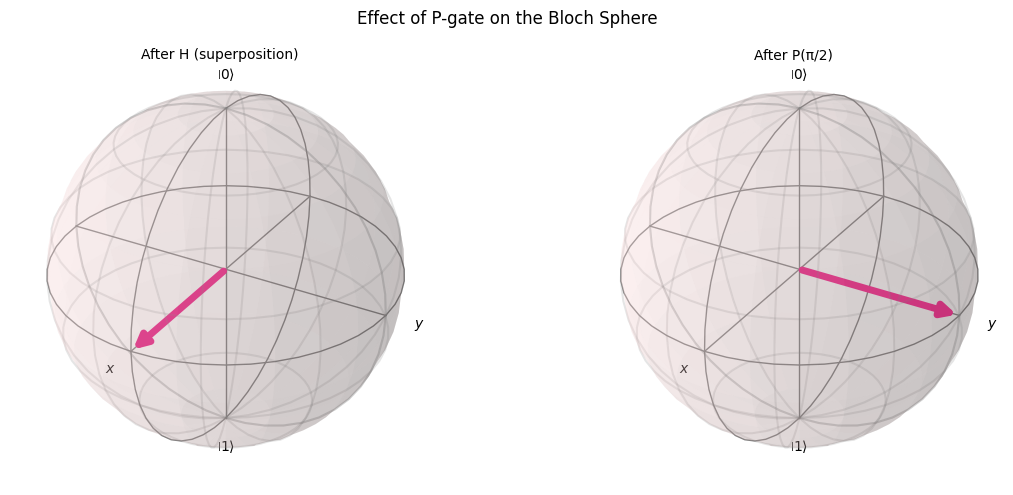

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Helper function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Create circuit and obtain statevectors

# Start with |0> and apply Hadamard to create superposition
qc_h = QuantumCircuit(1)
qc_h.h(0)  # H gate: puts qubit into superposition, |+>
state_h = Statevector.from_instruction(qc_h)

# Apply P(π/2) after Hadamard
qc_p = qc_h.copy()
qc_p.p(np.pi/2, 0)  # Phase gate: rotation around z-axis by π/2
state_p = Statevector.from_instruction(qc_p)

# Plot Bloch spheres side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_h), title="After H (superposition)", ax=axes[0])
plot_bloch_vector(bloch_coords(state_p), title="After P(π/2)", ax=axes[1])

plt.suptitle("Effect of P-gate on the Bloch Sphere")
plt.tight_layout()
plt.show()


<h4> Conclusion: </h4>

Applying $P(\frac{π}{2})$ to the $|+⟩$ state rotates the qubit around the $z$-axis by $(\frac{π}{2})$, changing its phase, as seen in the Bloch sphere comparison.
<hr>

<h3><b>Question 2</b></h3>

<p>Check whether applying $P\left(\frac{\pi}{2}\right)$ to the state $|+\rangle$ produces the same result as
applying $U(0, 0, \frac{\pi}{2})$ to the same state.</p>

<p>Do both gates cause the same type of rotation on the Bloch sphere, and do they affect measurement probabilities or only the relative phase?</p>

(Hint: Think about which component of the qubit state each gate rotates and how that would
affect the qubit’s position on the Bloch sphere.)


In [ ]:
# Your solution here

<hr>

<h3><b> $R_z$ gate </h3></b>


**Syntax in Qiskit:**

`qc.rz(φ, qubit)`

where $(\phi)$ is the rotation angle in radians.

<hr>

<h4>Description</h4>

The $R_z$ gate performs a rotation of a qubit’s state vector around the **$z$-axis** of the Bloch sphere by an angle $\phi$.  

This gate changes only the **phase** of the quantum state. It doesn’t alter the probability amplitudes of measuring $|0⟩$ or $|1⟩$.

Matrix form:

$$
R_z(\phi) =
\begin{pmatrix}
e^{\frac{-iϕ}{2}} & 0 \\
0 & e^{\frac{iϕ}{2}}
\end{pmatrix}
$$

Bloch sphere interpretation:
- The qubit stays at the same latitude (same distance from poles).
- The vector rotates around the vertical $z$-axis, changing its azimuthal angle.
- If the qubit starts in a superposition, the relative phase between $|0⟩$ and $|1⟩$ evolves.
<hr>

<h3><b> Example 3: Effect of $R_z$ gate on Bloch Sphere </h3></b>

Let’s apply an $R_z$ rotation to a qubit in superposition and visualize how it moves on the Bloch sphere.

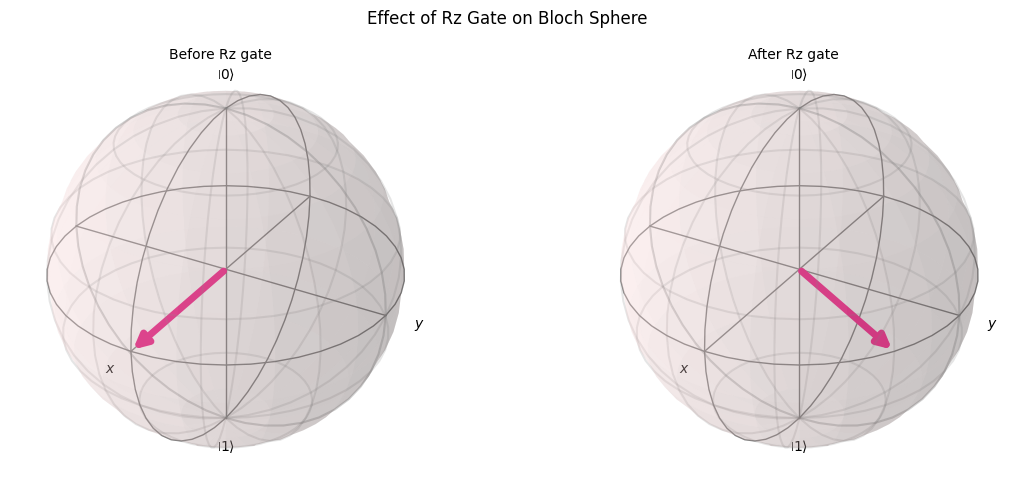

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Create circuit and obtain statevectors

# Prepare initial |+> state (superposition state)
qc_init = QuantumCircuit(1)
qc_init.h(0)  # Apply H gate
state_init = Statevector.from_instruction(qc_init)

# Apply Rz rotation
theta = np.pi/3  # Apply rotation angle of pi/3 (or any other angle)
qc_rz = qc_init.copy()
qc_rz.rz(theta, 0)  # Apply Rz gate
state_rz = Statevector.from_instruction(qc_rz)

# Plot Bloch spheres side by side (1: Initial, 2: After Rz gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_init), title="Before Rz gate", ax=axes[0])
plot_bloch_vector(bloch_coords(state_rz), title=f"After Rz gate", ax=axes[1])

plt.suptitle("Effect of Rz Gate on Bloch Sphere")
plt.tight_layout()
plt.show()


<h4> Conclusion:</h4>

<p> Applying $R_z(\frac{π}{3})$ to the $|+⟩$ state rotates the qubit around the $z$-axis by 60°,
changing only the relative phase. This rotation is visible in the $xy$-plane of the Bloch sphere,
without affecting measurement probabilities.</p>


<hr>

<h3><b>$R_y$ gate</b></h3>

**Syntax in Qiskit:**

`qc.ry(θ, qubit)`

where $(\theta)$ is the rotation angle in radians.

<hr>

<h4>Description</h4>

The $R_y$ gate rotates a qubit’s state vector around the **$y$-axis** of the Bloch sphere by an angle $\theta$.  
This changes the amplitudes of the $|0⟩$ and $|1⟩$ states, so it can affect measurement probabilities.

Matrix form:

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\frac{θ}{2}) & -\sin(\frac{θ}{2}) \\
\sin(\frac{θ}{2}) & \cos(\frac{θ}{2})
\end{pmatrix}
$$

Bloch sphere interpretation:
- The state vector rotates around the $y$-axis.
- Moves along a vertical circle through the $y$-axis.
- Can change the probability of measuring $|0⟩$ or $|1⟩$ depending on the initial state.
<hr>

<h3><b> Example 4: Effect of $R_y$ gate on Bloch Sphere </h3></b>

Let’s apply an $R_y$ rotation to a qubit in superposition and visualize how it moves on the Bloch sphere.

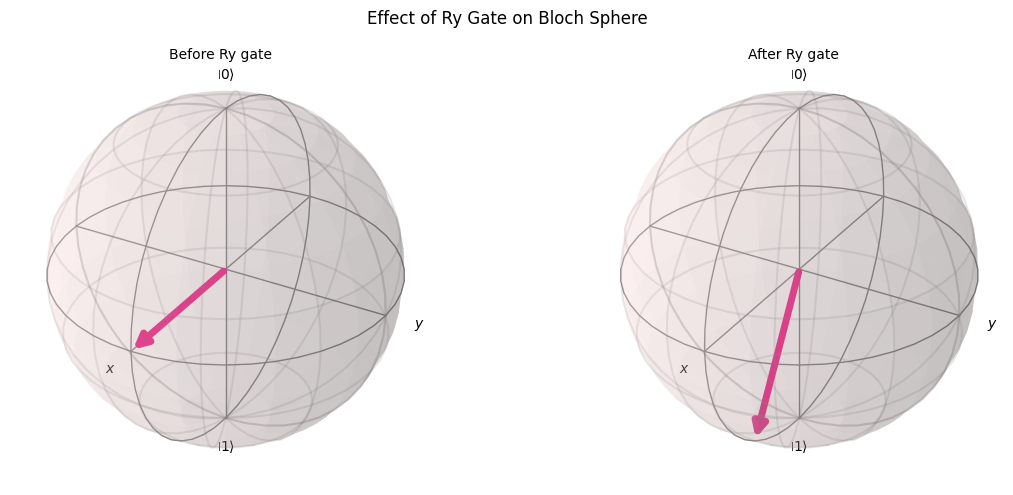

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Helper function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial |+> state (superposition state)
qc_init = QuantumCircuit(1)
qc_init.h(0)  # Apply H gate
state_init = Statevector.from_instruction(qc_init)

# Apply Ry rotation
theta = np.pi/3  # Apply rotation angle of pi/3 (or any other angle)
qc_ry = qc_init.copy()
qc_ry.ry(theta, 0)  # Apply Ry gate
state_ry = Statevector.from_instruction(qc_ry)

# Plot Bloch spheres side by side (1: Initial, 2: After Ry gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_init), title="Before Ry gate", ax=axes[0])
plot_bloch_vector(bloch_coords(state_ry), title=f"After Ry gate", ax=axes[1])

plt.suptitle("Effect of Ry Gate on Bloch Sphere")
plt.tight_layout()
plt.show()


<h4>Conclusion:</h4>

Applying $R_y(\frac{π}{3})$ to the $|+⟩$ state rotates the qubit around the $y$-axis,
changing its amplitudes along $|0⟩$ and $|1⟩$. This rotation is visible in the $xz$-plane of the Bloch sphere.


<hr>

<h3><b>$R_x$ gate</b></h3>

**Syntax in Qiskit:**

`qc.rx(θ, qubit)`

where $(\theta)$ is the rotation angle in radians.

<hr>

<h4>Description</h4>

The $R_x$ gate rotates a qubit’s state vector around the **$x$-axis** of the Bloch sphere by an angle $\theta$.  
This changes the amplitudes of the $|0⟩$ and $|1⟩$ states and can affect measurement probabilities.

Matrix form:

$$
R_x(\theta) =
\begin{pmatrix}
\cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\
-i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})
\end{pmatrix}
$$

Bloch sphere interpretation:
- Vector rotates around the $x$-axis.  
- Moves along a vertical circle through the $x$-axis.  
- Measurement probabilities can change depending on the initial state.
<hr>

<h3><b> Example 5: Effect of $R_x$ gate on Bloch Sphere </h3></b>

Let’s apply an $R_x$ rotation to a qubit in superposition and visualize how it moves on the Bloch sphere.

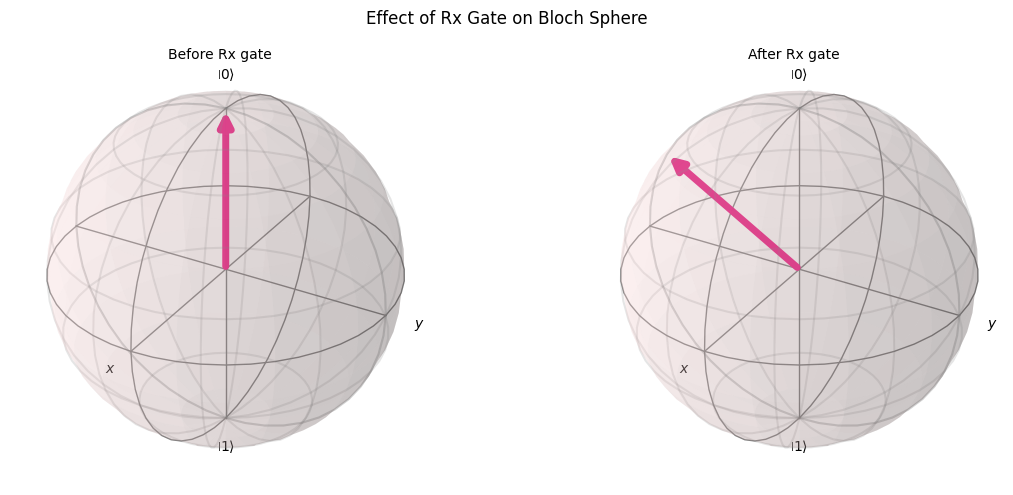

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Create circuit and obtain statevectors

# Initial |0> state
qc_init = QuantumCircuit(1)
state_init = Statevector.from_instruction(qc_init)

# Apply Rx rotation
theta = np.pi/3  # Apply rotation angle of pi/3
qc_rx = qc_init.copy()
qc_rx.rx(theta, 0)  # Apply Rx gate
state_rx = Statevector.from_instruction(qc_rx)

# Plot Bloch spheres side by side (1: Initial, 2: After Rx gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_init), title="Before Rx gate", ax=axes[0])
plot_bloch_vector(bloch_coords(state_rx), title=f"After Rx gate", ax=axes[1])

plt.suptitle("Effect of Rx Gate on Bloch Sphere")
plt.tight_layout()
plt.show()


<h4>Conclusion:</h4>

Applying $R_x(\frac{π}{3})$ to the $|0⟩$ state rotates the qubit around the $x$-axis,
moving it in the $yz$-plane. This changes the probability amplitudes along $|0⟩$ and $|1⟩$, making the rotation clearly visible.


<hr>

<h3><b>Question 3</b></h3>
<p>
Take the state $|0\rangle$. Apply $R_x(\theta)$, $R_y(\theta)$, and $R_z(\phi)$ rotations.
Which rotations leave the state unchanged?
Check using the Bloch sphere and statevector.
</p>

(Hint:
States along the rotation axis stay the same; others rotate in the perpendicular plane.)



In [ ]:
# Your solution here

<hr>

<h3><b>$I$ gate </b></h3>

**Syntax in Qiskit:**

`qc.id(qubit)`

where `qubit` is the target qubit.

<hr>

<h4>Description</h4>

The $I$ gate leaves a qubit’s state vector **unchanged**.  
Although it does not alter amplitudes or measurement probabilities, it can serve practical purposes, such as for circuit structuring or introducing delays.

Matrix form:

$$
I =
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

Bloch sphere interpretation:
- The state vector does not move.
- Probabilities of measuring $|0⟩$ or $|1⟩$ remain the same.
- Useful for visualizing circuit timing or structure without affecting the quantum state.

<hr>


<h3><b>Example: Identity Gate on |+⟩ State</b></h3>
<p>
Apply the Identity gate ($I$) to a qubit initially in the $|+\rangle$ state.
Verify that the statevector and Bloch sphere remain unchanged.
</p>


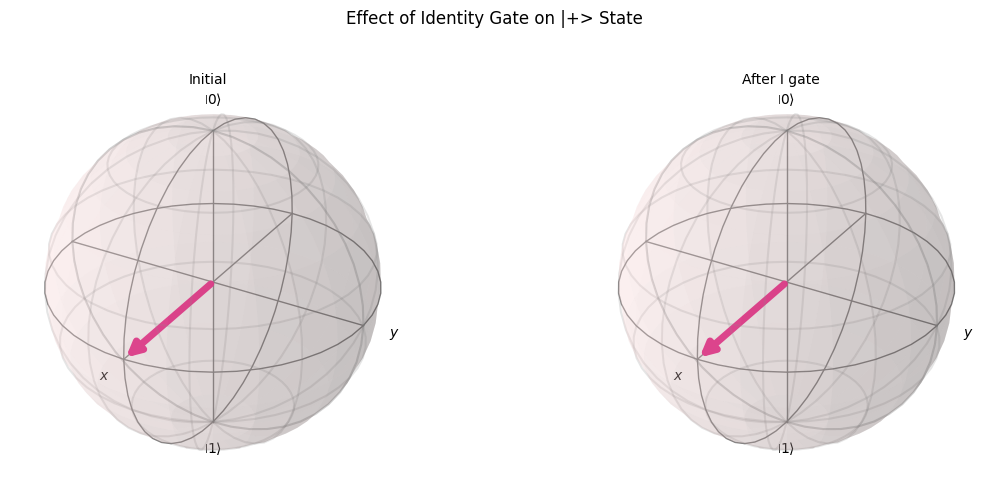

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial |+> state (superposition state)
qc_init = QuantumCircuit(1)
qc_init.h(0)  # Apply H gate
state_init = Statevector.from_instruction(qc_init)

# Apply Identity gate
qc_identity = qc_init.copy()
qc_identity.id(0)  # Apply Identity gate
state_identity = Statevector.from_instruction(qc_identity)

# Plot Bloch spheres side by side (1: Initial, 2: After I gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_init), title="Initial", ax=axes[0])
plot_bloch_vector(bloch_coords(state_identity), title="After I gate", ax=axes[1])

plt.suptitle("Effect of Identity Gate on |+> State")
fig.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()


<h4>Conclusion:</h4>
<p>
Applying the Identity gate ($I$) to the $|+\rangle$ state does not change the qubit. The statevector remains the same, the Bloch vector continues to point along the $+x$-axis, and the measurement probabilities are unchanged. This illustrates that the Identity gate performs no operation on the qubit.
</p>



<hr>

<h2><b>Pauli Gates</h2><b>


<h3><b>$X$ gate </b></h3>

The Pauli-X gate is also called the <b>bit-flip gate</b> because it flips the computational basis states, where it turns $|0⟩$ into $|1⟩$ and vice versa.

**Syntax in Qiskit:**

`qc.x(qubit)`

where `qubit` is the target qubit.

<hr>

<h4>Description</h4>

The $X$ gate performs a rotation of the qubit’s state vector around the **$x$-axis** of the Bloch sphere by an angle of $\pi$ (180°).  
It exchanges the amplitudes of $|0⟩$ and $|1⟩$, which effectively flips the qubit state.

Matrix form:

$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

Bloch sphere interpretation:
- The state vector rotates around the $x$-axis by 180°.
- $|0⟩$ becomes $|1⟩$ and $|1⟩$ becomes $|0⟩$.
- Superposition states (like $|+⟩$ or $|-⟩$) are also rotated around the $x$-axis, changing their orientation on the Bloch sphere.

<hr>


<h3><b>Example: Effect of $X$ Gate on a Slightly Rotated |0⟩ State</b></h3>
<p>
Prepare a qubit slightly rotated from the $|0\rangle$ state (e.g., by applying $R_y(\theta)$ with a small angle $\theta$). Apply the $X$ gate and observe how the statevector rotates 180° around the $x$-axis on the Bloch sphere.
</p>

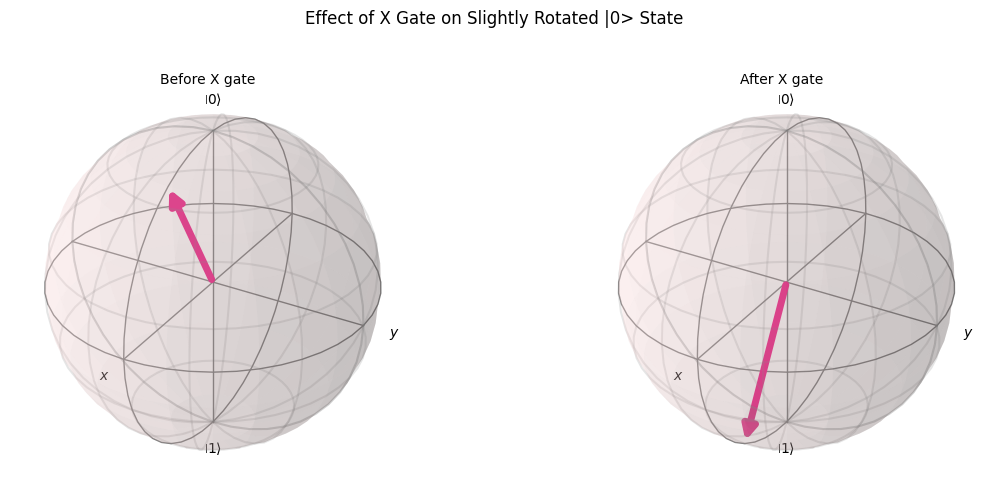

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare slightly rotated |0> state
theta = np.pi/6  # Apply small rotation angle
qc_rot = QuantumCircuit(1)
qc_rot.ry(theta, 0)  # Rotate |0> slightly around y-axis
state_before = Statevector.from_instruction(qc_rot)

# Apply X gate
qc_x = qc_rot.copy()
qc_x.x(0)  # Apply X gate
state_after = Statevector.from_instruction(qc_x)

# Plot Bloch spheres side by side (1: Initial, 2: After X gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

# Before X
plot_bloch_vector(bloch_coords(state_before), title="Before X gate", ax=axes[0])

# After X
plot_bloch_vector(bloch_coords(state_after), title="After X gate", ax=axes[1])

plt.suptitle("Effect of X Gate on Slightly Rotated |0> State")
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<h4>Conclusion:</h4>
<p>

In this example, the qubit was initially prepared in a slightly rotated $|0⟩$ state using $R_y(\frac{\pi}{6})$.  
Applying the $X$ gate flipped the qubit across the $x$-axis of the Bloch sphere, inverting its $z$-component while keeping the $xy$ orientation.  

The Bloch sphere plots show how the $X$ gate performs a 180° rotation around the $x$-axis even on a slightly rotated initial state.


<hr>

<h3><b>$Z$ gate</b></h3>

**Syntax in Qiskit:**

<code>qc.z(qubit)</code>

where `qubit` is the target qubit.

<hr>

<h4>Description</h4>

The $Z$ gate leaves the probability amplitudes of $|0⟩$ and $|1⟩$ unchanged, but flips the relative phase between them:  

- $|0⟩ \rightarrow |0⟩$  
- $|1⟩ \rightarrow -|1⟩$  

Matrix form:

$$
Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

Bloch sphere interpretation:

- The qubit rotates around the $z$-axis by 180°.  
- States along the $z$-axis remain unchanged.  
- Superposition states experience a **phase flip**, which can be seen as a rotation around the vertical axis.
<hr>

<h3><b>Example: Applying $Z$ Gate to |+⟩ State</b></h3>
Apply the $Z$ gate to a qubit in the $|+⟩$ state and observe how the statevector rotates 180° around the $z$-axis on the Bloch sphere.


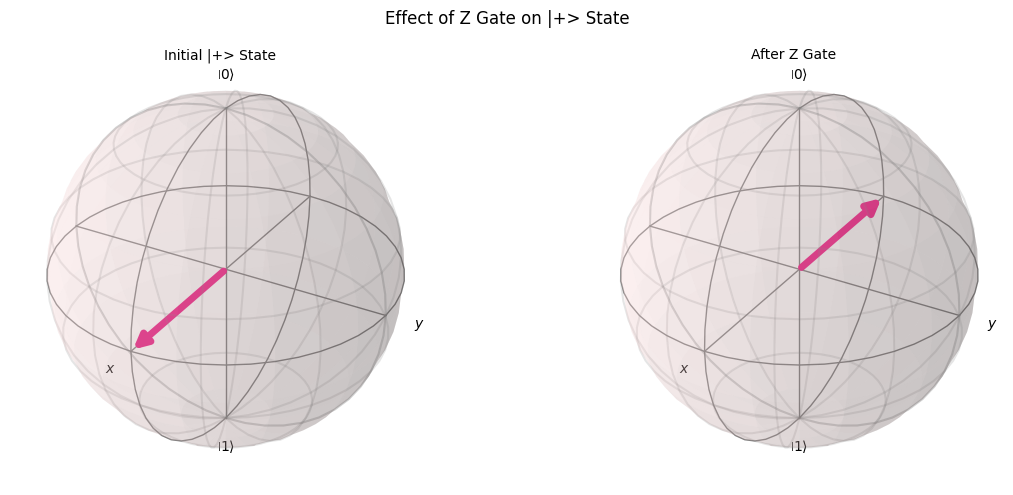

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial |+> state (superposition state)
qc_plus = QuantumCircuit(1)
qc_plus.h(0)  # Apply H gate
state_before = Statevector.from_instruction(qc_plus)

# Apply Z gate
qc_z = qc_plus.copy()
qc_z.z(0)  # Apply Z gate
state_after = Statevector.from_instruction(qc_z)

# Plot Bloch spheres side by side (1: Initial, 2: After Pauli-Z gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

# Before Z gate
plot_bloch_vector(bloch_coords(state_before), title="Initial |+> State", ax=axes[0])

# After Z gate
plot_bloch_vector(bloch_coords(state_after), title="After Z Gate", ax=axes[1])

plt.suptitle("Effect of Z Gate on |+> State")
plt.tight_layout()
plt.show()


<h4>Conclusion:</h4>
<p>

In this example, the qubit was initially prepared in the $|+⟩$ state.  
Applying the $Z$ gate rotates the qubit 180° around the $z$-axis of the Bloch sphere.  

The Bloch sphere plots show that the $x$-component of the statevector flips sign, while the $z$-component remains unchanged, confirming the $Z$ gate acts as a phase-flip on superposition states.


<hr>

<h3><b>$Y$ gate</b></h3>

**Syntax in Qiskit:**

<code>qc.y(qubit)</code>

where `qubit` is the target qubit.

<hr>

<h4>Description</h4>

The $Y$ gate flips both the bit and the phase of the qubit:

- $|0⟩ \rightarrow i|1⟩$  
- $|1⟩ \rightarrow -i|0⟩$  

Matrix form:

$$
Y =
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
$$

Bloch sphere interpretation:

- The qubit rotates around the $y$-axis by 180°.  
- States along the $y$-axis remain unchanged.  
- Superposition states experience both **bit and phase flips**, which can be visualized as a rotation around the $y$-axis.
<hr>


<h4><b>Example: Applying $Y$ Gate to $|0⟩$ State</b></h4>

Apply the $Y$ gate to a qubit in the $|0⟩$ state and observe how the statevector rotates 180° around the $y$-axis on the Bloch sphere.


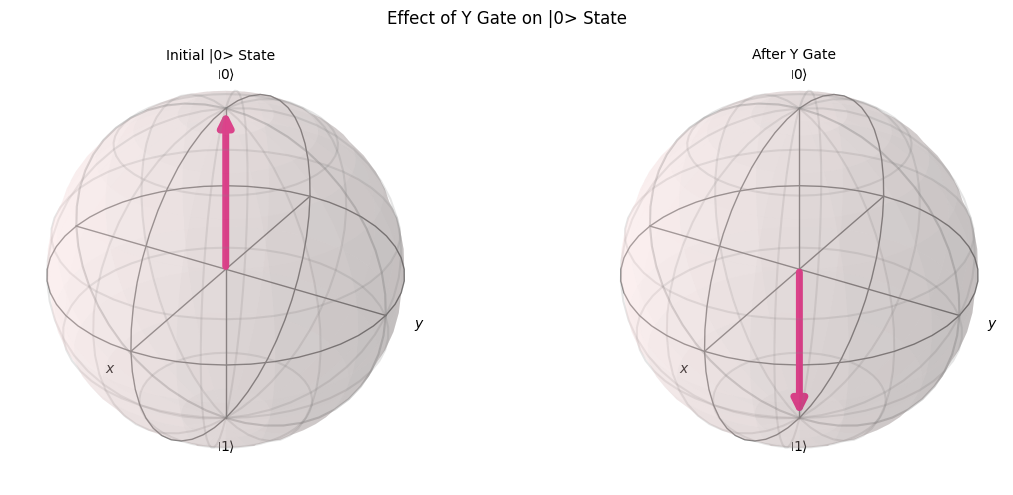

In [10]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial |0> state
qc_zero = QuantumCircuit(1)
state_before = Statevector.from_instruction(qc_zero)

# Apply Y gate
qc_y = qc_zero.copy()
qc_y.y(0)  # Apply Y gate
state_after = Statevector.from_instruction(qc_y)

# Plot Bloch spheres side by side (1: Initial, 2: After Y gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

# Before Y
plot_bloch_vector(bloch_coords(state_before), title="Initial |0> State", ax=axes[0])

# After Y
plot_bloch_vector(bloch_coords(state_after), title="After Y Gate", ax=axes[1])

plt.suptitle("Effect of Y Gate on |0> State")
plt.tight_layout()
plt.show()


<h3>Conclusion:</h3>

<p>
In this example, the qubit was initially in the $|0⟩$ state.  
Applying the $Y$ gate rotates the qubit 180° around the $y$-axis of the Bloch sphere.  

The Bloch sphere plots show that the qubit moves from the north pole to the south pole, confirming that the $Y$ gate acts as a rotation around the $y$-axis.


<hr>

<h3><b>Question 4</b></h3>

Starting from the state $|0⟩$ or the superposition state $|+⟩$, apply one or more of the gates $X$, $Y$, and $Z$.  
Which new states can you obtain? Check your results by examining the statevector and plotting the Bloch sphere.

(Hint: Remember that $X$ flips the qubit (bit-flip), $Y$ flips both bit and phase, $Z$ flips only the phase.)

Use the Bloch sphere to visualize rotations and see which states are equivalent after applying different gates.


In [ ]:
# Your solution here

<hr>

<h3><b>$H$ gate</b></h3>

**Syntax in Qiskit:**

<code>qc.h(qubit)</code>

where `qubit` is the target qubit.
<hr>

<h4>Description</h4>
It can be defined as an instance of the $U$ gate: $H = U(\frac{\pi}{2}, 0, \pi)$.  
This gate performs a combination of rotations on the Bloch sphere that maps the basis states $|0⟩$ and $|1⟩$ into equal superpositions.
The H gate transforms the qubit state as follows:

- $|0⟩ \rightarrow |+⟩ = \frac{|0⟩ + |1⟩}{\sqrt{2}}$  
- $|1⟩ \rightarrow |−⟩ = \frac{|0⟩ - |1⟩}{\sqrt{2}}$  

Matrix form:

$$
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

Bloch sphere interpretation:

- The qubit rotates around the $y$-axis by 90°, followed by a rotation around the $x$-axis by 180°.  
- States at the poles ($|0⟩$ or $|1⟩$) move to the equator, creating an equal superposition.  
- Superposition states are rotated to different points on the equator, depending on the initial state.

<hr>

<h3><b>Example: Applying Hadamard Gate to $|0⟩$ State</b></h3>

Apply the Hadamard gate to a qubit in the $|0⟩$ state and observe how the statevector moves from the north pole to the equator on the Bloch sphere.


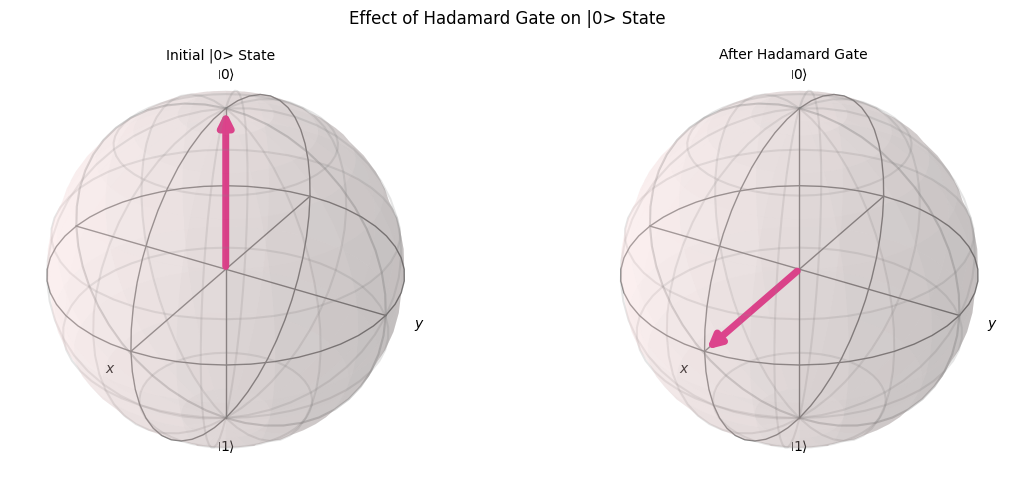

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial |0> state
qc_zero = QuantumCircuit(1)
state_before = Statevector.from_instruction(qc_zero)

# Apply Hadamard gate
qc_h = qc_zero.copy()
qc_h.h(0)  # Apply Hadamard gate
state_after = Statevector.from_instruction(qc_h)

# Plot Bloch spheres side by side (1: Initial, 2: After H gate)
fig, axes = plt.subplots(1, 2, figsize=(12,5), subplot_kw={'projection':'3d'})

# Before H
plot_bloch_vector(bloch_coords(state_before), title="Initial |0> State", ax=axes[0])

# After H
plot_bloch_vector(bloch_coords(state_after), title="After Hadamard Gate", ax=axes[1])

plt.suptitle("Effect of Hadamard Gate on |0> State")
plt.tight_layout()
plt.show()


<h4>Conclusion</h4>

Applying the Hadamard gate to a qubit in the $|0⟩$ state transforms it into the superposition state
$|+\rangle = \frac{|0⟩ + |1⟩}{\sqrt{2}}$.

On the Bloch sphere, the statevector moves from the north pole to the equator, illustrating how the Hadamard gate creates an equal superposition of $|0⟩$ and $|1⟩$.


<hr>

<h4><b>Question 5</b></h4>

Apply a Hadamard gate to a qubit. Can you reproduce the same final state by first applying an $R_y(\frac{π}{2})$ rotation followed by an $X$ gate?  
Try it with different initial states and compare the results using the Bloch sphere and statevectors.


In [ ]:
# Your solution here

<hr>

<h3><b>$S$ and $S^\dagger$ gates</b></h3>

The $S$ gate is also called the phase gate, and $S^\dagger$ is its conjugate.  
They perform rotations around the $z$-axis of the Bloch sphere by $\frac{π}{2}$ and $\frac{-π}{2}$, respectively.  
These gates only change the phase of the qubit without affecting measurement probabilities.

<b>Syntax in Qiskit:</b>

<code>qc.s(qubit)</code> &nbsp;&nbsp;for $S$ gate<br>
<code>qc.sdg(qubit)</code> &nbsp;&nbsp;for $S^†$ gate

where `qubit` is the target qubit.

<hr>

<h4>Description</h4>

The $S$ and $S^†$ gates transform the qubit state as follows:

- $|0⟩ \rightarrow |0⟩$ (unchanged)  
- $|1⟩ \rightarrow i|1⟩$ with $S$, $|1⟩ \rightarrow -i|1⟩$ with $S^†$  

Matrix form:

$$
S =
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}, \quad
S^\dagger =
\begin{pmatrix}
1 & 0 \\
0 & -i
\end{pmatrix}
$$

Bloch sphere interpretation:

- The qubit rotates around the $z$-axis by 90° ($S$) or -90° ($S^†$).  
- States on the $z$-axis remain fixed.  
- Superposition states are rotated along the equator, changing the <b>relative phase</b> between $|0⟩$ and $|1⟩$.

<hr>

<h4><b>Example: Applying $S$ and $S^†$ Gates to $|+⟩$</b></h4>

Apply the $S$ and $S^†$ gates to a qubit in the $|+⟩$ state and observe how the statevector rotates ±90° around the $z$-axis on the Bloch sphere.


In [13]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare initial |+> state
qc_plus = QuantumCircuit(1)
qc_plus.h(0)  # |+> = (|0> + |1>)/√2
state_before = Statevector.from_instruction(qc_plus)

# Apply S gate
qc_s = qc_plus.copy()
qc_s.s(0)  # S gate
state_s = Statevector.from_instruction(qc_s)
-
# Apply S† gate
qc_sdg = qc_plus.copy()
qc_sdg.sdg(0)  # S† gate
state_sdg = Statevector.from_instruction(qc_sdg)

# Plot Bloch spheres side by side
fig, axes = plt.subplots(1, 3, figsize=(15,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_before), title="Initial |+> State", ax=axes[0])
plot_bloch_vector(bloch_coords(state_s), title="After S Gate", ax=axes[1])
plot_bloch_vector(bloch_coords(state_sdg), title="After S† Gate", ax=axes[2])

plt.suptitle("Effect of S and S† Gates on |+> State")
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (ipython-input-3789954895.py, line 24)

<h4>Conclusion:</h4>

Applying the $S$ and $S^†$ gates to $|+⟩$ rotates the statevector ±90° around the $z$-axis.  
The qubit remains on the equator of the Bloch sphere, with the phase of the $|1⟩$ component changing, demonstrating the phase-shifting effect of these gates.


<hr>

<h3><b> $T$ and $T^\dagger$ gates </h3></b>

**Syntax in Qiskit:**

<code>qc.t(qubit)</code> for $T$ gate

<code>qc.tdg(qubit)</code> % for $T^†$ gate

<hr>
<h4> Description </h4>

The $T$ gate is also called the $\frac{π}{8}$ gate, and $T^\dagger$ is its conjugate.  
They perform rotations around the $z$-axis of the Bloch sphere by $\frac{π}{4}$ and $\frac{-π}{4}$, respectively.  

Matrix form:

$$
T =
\begin{pmatrix}
1 & 0 \\
0 & e^\frac{iπ}{4}
\end{pmatrix}, \quad
T^\dagger =
\begin{pmatrix}
1 & 0 \\
0 & e^\frac{-iπ}{4}
\end{pmatrix}
$$

Bloch sphere interpretation:
- The qubit rotates around $z$-axis by 45° ($T$) or -45° ($T^†$).
- States on the $z-axis$ remain fixed.
- Superposition states are rotated along the equator, changing the relative phase between $|0\rangle$ and $|1\rangle$.

<hr>

<h3><b> Example: Applying $T$ and $T^†$ Gates to $|+\rangle$ </h3></b>

Apply the $T$ gate to a qubit in the $|+\rangle$ state, where the statevector rotates $45^\circ$ around the $z$-axis on the Bloch sphere.  

Apply the $T^\dagger$ gate to $|+\rangle$, where the statevector rotates $-45^\circ$ around the $z$-axis.


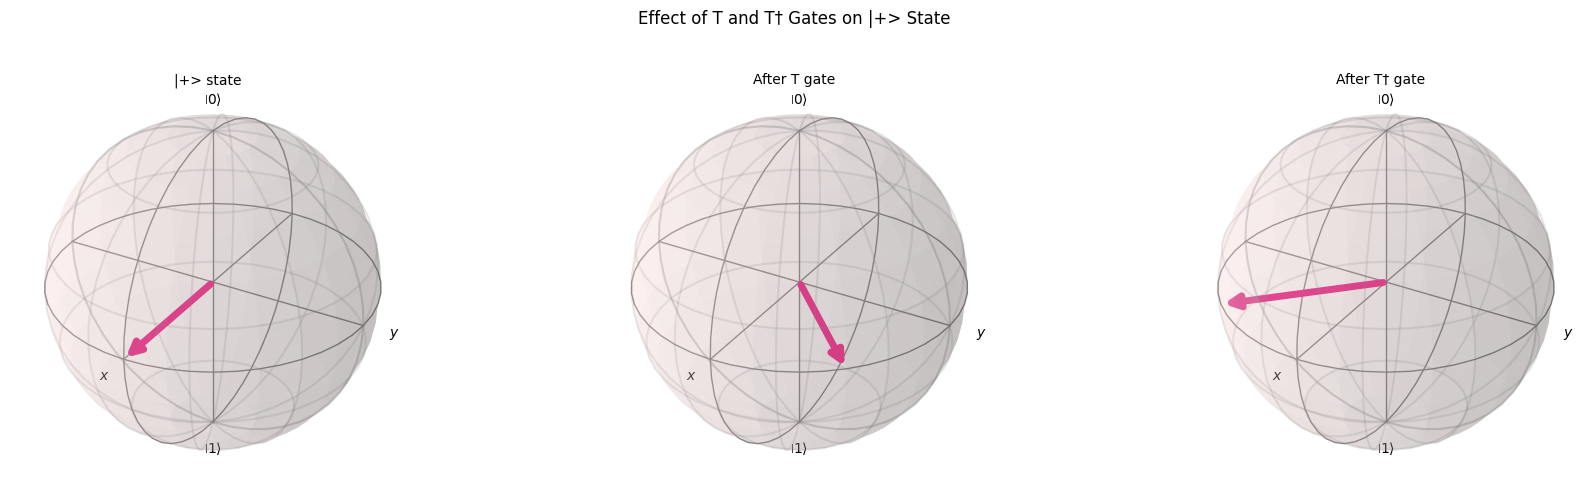

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

# Function to convert statevector to Bloch vector
def bloch_coords(state):
    a, b = state.data
    x = 2 * np.real(np.conj(a) * b)
    y = 2 * np.imag(np.conj(a) * b)
    z = np.abs(a)**2 - np.abs(b)**2
    return [x, y, z]

# Prepare |+> state
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
state_plus = Statevector.from_instruction(qc_plus)

# Apply T gate
qc_t = qc_plus.copy()
qc_t.t(0)
state_t = Statevector.from_instruction(qc_t)

# Apply T† gate
qc_td = qc_plus.copy()
qc_td.tdg(0)
state_td = Statevector.from_instruction(qc_td)

# Plot Bloch spheres side by side
fig, axes = plt.subplots(1, 3, figsize=(18,5), subplot_kw={'projection':'3d'})

plot_bloch_vector(bloch_coords(state_plus), title="|+> state", ax=axes[0])
plot_bloch_vector(bloch_coords(state_t), title="After T gate", ax=axes[1])
plot_bloch_vector(bloch_coords(state_td), title="After T† gate", ax=axes[2])

plt.suptitle("Effect of T and T† Gates on |+> State")
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<h3><b> Question 6 </h3></b>

Starting from the state $|+\rangle$, use only $S$ and $T$ gates to rotate the statevector around the Bloch sphere. Can you reach the state
$|-i\rangle$ =$ \frac{|0\rangle - i|1\rangle}{\sqrt{2}}$?

(Hint: The $S$ gate rotates ±90° around the $z$-axis, the $T$ gate rotates ±45° around the $z$-axis. Phase gates alone move the state along the equator of the Bloch sphere.)




In [ ]:
# Your solution here

<h3><b>Question 7: Designing a Qubit for a Quantum Protocol</b></h3>
<p>

You are tasked with preparing a qubit in a specific superposition state needed for a quantum algorithm. Starting from $|0\rangle$, apply a sequence of single-qubit gates:
$H \rightarrow R_y(\pi/4) \rightarrow T \rightarrow R_z(\pi/2) \rightarrow S \rightarrow X$
to reach a target state that is neither purely on the equator nor at the poles.  

Visualize how the statevector moves on the Bloch sphere and describe its **final orientation** in terms of polar and azimuthal angles.
</p>

Hint:
<ul>
<li>Use rotation gates $R_x, R_y, R_z$ to control latitude and longitude.</li>
<li>Phase gates $S, T$ rotate the qubit around the
$z$-axis without changing latitude.</li>
<li>The $H$ gate moves the qubit from the pole to the equator, setting up interference.</li>
<li>Pauli-$X$ flips the state along the $x$-axis. Combine all to reach the desired orientation.</li>
<li>Visualize each step on the Bloch sphere to understand the cumulative effect of rotations and phase adjustments.</li>
</ul>


In [ ]:
# Your solution here